# Instalar los modulos

In [1]:
!pip install prody
!pip install MDAnalysis[analysis] MDAnalysisTests

^C
ERROR: Operation cancelled by user


In [6]:
!wget https://raw.githubusercontent.com/cabb99/cdec039/master/Clase4/sample_trajectory.pdb

--2020-12-20 05:08:44--  https://raw.githubusercontent.com/cabb99/cdec039/master/Clase4/sample_trajectory.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4099053 (3.9M) [text/plain]
Saving to: ‘sample_trajectory.pdb’

sample_trajectory.p 100%[===================>]   3.91M  25.0MB/s    in 0.2s    

2020-12-20 05:08:45 (25.0 MB/s) - ‘sample_trajectory.pdb’ saved [4099053/4099053]



# Alinear y calcular RMSD
$${RMSD}=\frac{\sum_{i=1}^n \sqrt{(x_1-x_0)^2+(y_1-y_0)^2+(z_1-z_0)^2}}{n}$$

In [182]:
#Importar modulos
import prody
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)

In [183]:
template=prody.parsePDB('initial.pdb') #Estructura inicial
traj=prody.parsePDB('sample_trajectory.pdb') #Trajectoria

@> 50 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 50 atoms and 1000 coordinate set(s) were parsed in 0.16s.


In [184]:
#Calcular RMSD (root mean square deviation)
rmsds = prody.calcRMSD(traj)
rmsds.mean()

490.250452494701

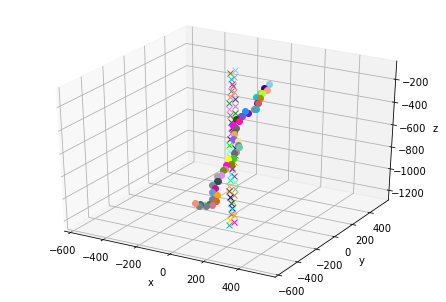

In [185]:
#Visualizar la molecula (no esta alineada)
prody.showProtein(template,hmarker='x')
traj.setACSIndex(0)
prody.showProtein(traj)
#plt.legend()

In [186]:
#Ver las coordenadas
x=traj.getCoords()
x

array([[  203.79 ,     9.818,   -67.309],
       [  191.848,   -18.856,   -93.744],
       [  193.804,     9.268,  -124.631],
       [  165.634,    -9.078,  -144.808],
       [  159.354,    23.452,  -166.01 ],
       [  137.595,     5.418,  -195.242],
       [  140.683,    35.939,  -219.387],
       [  139.909,    11.586,  -252.855],
       [  124.357,    45.753,  -273.022],
       [  125.368,    22.824,  -308.856],
       [   98.943,    47.449,  -326.023],
       [   86.133,    14.075,  -348.593],
       [   54.094,    36.937,  -357.673],
       [   46.883,    14.27 ,  -390.66 ],
       [   32.012,    48.364,  -408.968],
       [    7.803,    23.976,  -431.453],
       [   10.024,    53.203,  -462.095],
       [   -7.028,    23.38 ,  -485.356],
       [    0.665,    44.56 ,  -517.292],
       [    4.921,    11.384,  -542.056],
       [  -10.879,    37.157,  -572.506],
       [    1.415,     9.132,  -598.338],
       [   13.341,    38.62 ,  -624.454],
       [   28.836,    11.388,  -64

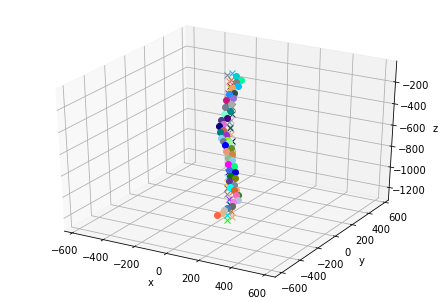

In [187]:
#Alinear la proteina
superposed,transformation=prody.superpose(traj,template)
prody.showProtein(template,hmarker='x')
traj.setACSIndex(0)
prody.showProtein(superposed)

In [188]:
#Coordenadas nuevas
superposed.getCoords()

array([[   21.58728046,    36.75148223,   -36.17872897],
       [   49.00949328,    35.85167061,   -66.3587132 ],
       [   18.23091734,    41.69766426,   -94.05881613],
       [   37.88141285,    22.27240747,  -121.8752388 ],
       [    4.56032036,    17.18986342,  -142.14927748],
       [   22.35455938,     6.14663983,  -177.00040847],
       [  -10.33151289,    11.05423756,  -197.77501736],
       [   10.89256121,    22.04233786,  -231.57701492],
       [  -22.87533408,     7.59268909,  -253.18473067],
       [   -3.47712719,    20.69438085,  -288.7219219 ],
       [  -26.27280246,    -3.63734614,  -310.80588417],
       [    6.24155365,    -5.70596108,  -337.74771698],
       [  -13.44093901,   -37.21562654,  -353.60190981],
       [    6.90834268,   -32.7451431 ,  -388.52833377],
       [  -26.70248729,   -47.00067187,  -408.17069487],
       [   -1.74079014,   -61.23060839,  -437.51090673],
       [  -33.61975035,   -55.34180389,  -464.84470287],
       [   -4.18461684,   -61.7

In [189]:
#Matriz de transformacion
transformation.getMatrix().round(2)

array([[  -0.12,   -0.99,    0.09,   61.01],
       [   0.96,   -0.14,   -0.25, -174.15],
       [   0.26,    0.06,    0.96,  -25.08],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [190]:
#Matriz de rotacion
transformation.getRotation().round(2)

array([[-0.12, -0.99,  0.09],
       [ 0.96, -0.14, -0.25],
       [ 0.26,  0.06,  0.96]])

In [191]:
#Matriz de translacion
transformation.getTranslation().round(2)

array([  61.01, -174.15,  -25.08])

In [192]:
#Transformar la matriz de coordenadas original(x)
np.dot(x, transformation.getRotation().T) + transformation.getTranslation()

array([[   21.58728046,    36.75148223,   -36.17872897],
       [   49.00949328,    35.85167061,   -66.3587132 ],
       [   18.23091734,    41.69766426,   -94.05881613],
       [   37.88141285,    22.27240747,  -121.8752388 ],
       [    4.56032036,    17.18986342,  -142.14927748],
       [   22.35455938,     6.14663983,  -177.00040847],
       [  -10.33151289,    11.05423756,  -197.77501736],
       [   10.89256121,    22.04233786,  -231.57701492],
       [  -22.87533408,     7.59268909,  -253.18473067],
       [   -3.47712719,    20.69438085,  -288.7219219 ],
       [  -26.27280246,    -3.63734614,  -310.80588417],
       [    6.24155365,    -5.70596108,  -337.74771698],
       [  -13.44093901,   -37.21562654,  -353.60190981],
       [    6.90834268,   -32.7451431 ,  -388.52833377],
       [  -26.70248729,   -47.00067187,  -408.17069487],
       [   -1.74079014,   -61.23060839,  -437.51090673],
       [  -33.61975035,   -55.34180389,  -464.84470287],
       [   -4.18461684,   -61.7

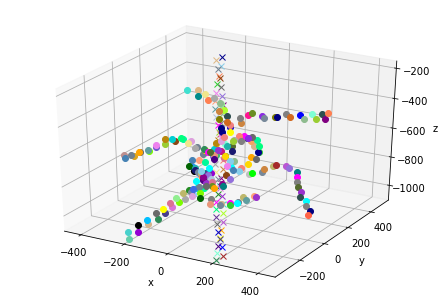

In [193]:
#Solo hemos alineado una estructura, necesitamos alinear la trayectoria
prody.showProtein(template,hmarker='x')
for i in [200,400,600,800]:
    traj.setACSIndex(i)
    prody.showProtein(superposed)

In [194]:
#Alinear trayectoria
traj.setACSIndex(0)
prody.alignCoordsets(traj);

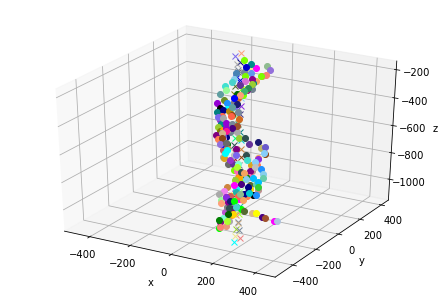

In [198]:
#Ver la trayectoria alineada
prody.showProtein(template,hmarker='x')
for i in [200,400,600,800]:
    traj.setACSIndex(i)
    prody.showProtein(traj)

In [199]:
#Calcular RMSD nuevamente
traj.setACSIndex(0)
rmsds = prody.calcRMSD(traj)
print(rmsds.mean())

117.12408869863783


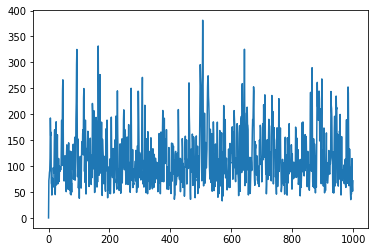

In [200]:
#Plot de RMSD durante la simulacion
plt.plot(rmsds)

# Calcular longitud de enlaces


In [247]:
#Calcular distancias entre los atomos
import scipy.spatial.distance as sdist
d=sdist.pdist(template.getCoords())
d

array([41.01403439, 56.85485951, 89.12954575, ..., 41.0142017 ,
       56.8548482 , 41.01392111])

In [248]:
d.shape

(1225,)

In [249]:
distances=sdist.squareform(d)
distances.shape

(50, 50)

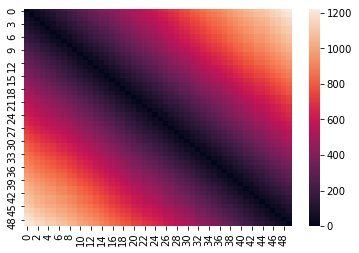

In [527]:
#Ver matriz de distancias
import seaborn as sns
sns.heatmap(distances)

In [528]:
distances[:5,:5].round(1)

array([[  0. ,  41.6,  57.9,  90.1, 112.3],
       [ 41.6,   0. ,  42.6,  57.4,  90.1],
       [ 57.9,  42.6,   0. ,  41.7,  57.9],
       [ 90.1,  57.4,  41.7,   0. ,  40.3],
       [112.3,  90.1,  57.9,  40.3,   0. ]])

In [529]:
#Tomar distancias entre i e i+1
np.diag(distances,k=1)

array([41.55561982, 42.62511444, 41.66349895, 40.29289125, 39.06608213,
       37.03913058, 39.96050261, 42.37938456, 40.03436966, 40.52432822,
       40.16134949, 41.56267472, 40.84556483, 42.05857373, 41.36281323,
       40.40513549, 39.35522818, 40.6326293 , 41.35842698, 40.12998715,
       38.19983763, 41.33415238, 42.29527196, 38.38267426, 40.22548134,
       41.71547359, 39.63868926, 41.21800668, 39.77458073, 40.17295475,
       40.83944287, 41.28234258, 38.42397374, 41.07699321, 40.45062346,
       41.49521423, 40.98699011, 40.1447422 , 40.90118658, 42.1244168 ,
       43.05506239, 38.34204786, 41.46669396, 41.42389834, 39.17199599,
       41.84182661, 41.42703428, 40.89344918, 41.90976532])

In [530]:
#Calcular distancias promedio en la estructura inicial
ref_bonds={}
for i in range(10):
    ref_bonds[i]=np.diag(distances,k=i)
    print(ref_bonds[i].mean().round(4),'±',ref_bonds[i].std().round(4))

0.0 ± 0.0
40.6781 ± 1.2495
57.2025 ± 1.5837
88.8981 ± 1.4384
111.8605 ± 3.2874
141.075 ± 3.308
165.6573 ± 4.0861
193.9014 ± 4.0162
219.214 ± 4.8375
246.8026 ± 4.3944


In [254]:
traj.getCoordsets().shape

(1000, 50, 3)

In [255]:
#Calcular distancias promedio en la trayectoria
bonds={i:[] for i in range(10)}
for frame in traj.getCoordsets():
    d=sdist.pdist(frame)
    distances=sdist.squareform(d)
    for i in range(10):
        bonds[i]+=[np.diag(distances,k=i)]
for i in range(10):
    bonds[i]=np.concatenate(bonds[i])

In [256]:
for i in range(10):
    print(bonds[i].mean().round(4),'±',bonds[i].std().round(4))

0.0 ± 0.0
41.026 ± 1.4627
57.1128 ± 1.4191
88.9602 ± 1.3761
111.6623 ± 3.2209
140.8461 ± 3.9967
164.6778 ± 6.1778
192.2838 ± 7.6838
216.2136 ± 10.1952
242.6418 ± 12.2861


In [532]:
#Ver la distribucion de distancias
import pandas
data=pandas.concat([pandas.Series(bonds[b]-ref_bonds[b].mean(),name=b) for b in bonds],keys=bonds.keys())
data=data.reset_index()
data.columns=['Bond','id','distance']
data.tail()

,Bond,id,distance
454995,9,40995,-2.529987
454996,9,40996,-1.986307
454997,9,40997,-1.651097
454998,9,40998,1.042243
454999,9,40999,0.075141


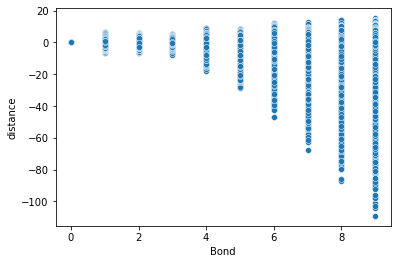

In [533]:
import seaborn as sns
sns.scatterplot(x='Bond',y='distance',data=data)
#plt.xlim(0,10)
#plt.ylim(-20,20)

/home/cab22/Programs/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cab22/Programs/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cab22/Programs/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cab22/Programs/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(-20.0, 20.0)

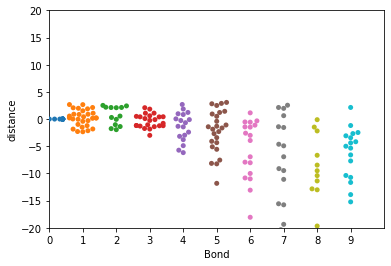

In [298]:
import seaborn as sns
sns.swarmplot(x='Bond',y='distance',data=data.sample(200))
plt.xlim(0,10)
plt.ylim(-20,20)

(-20.0, 20.0)

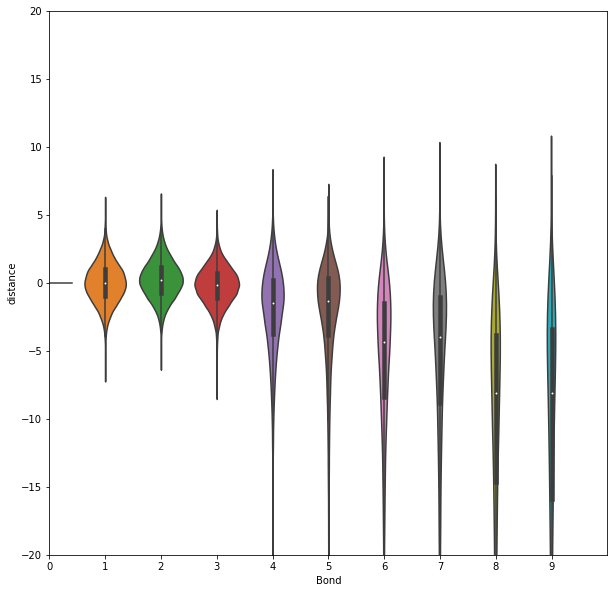

In [428]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.violinplot(x='Bond',y='distance',data=data)
plt.xlim(0,10)
plt.ylim(-20,20)

# Calcular longitud de persistencia

La longitud de persistencia es una longitud caracteristica de un polimero. Es aproximadamente la distancia en la cual el polimero cambia de direccion.

$$cos(\theta)=e^{-\frac{L}{L_p}}$$

/home/cab22/Programs/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


The persistence length is 1.0 Angstroms


/home/cab22/Programs/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


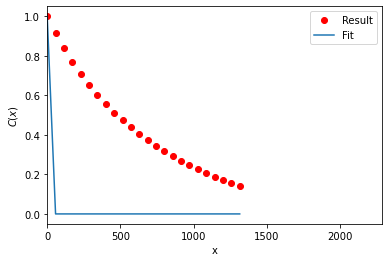

In [534]:
%matplotlib inline
from MDAnalysis.tests.datafiles import TRZ_psf, TRZ
import MDAnalysis as mda
from MDAnalysis.analysis import polymer
u = mda.Universe('sample_trajectory.pdb')
u = mda.Universe('sample_trajectory.pdb')
persistence_length = polymer.PersistenceLength([u.atoms[::2],u.atoms[1::2]])
persistence_length.run(start=10,step=1)
print('The persistence length is {} Angstroms'.format(persistence_length.lp))
persistence_length.plot()

The persistence length is 685.519009326808 Angstroms


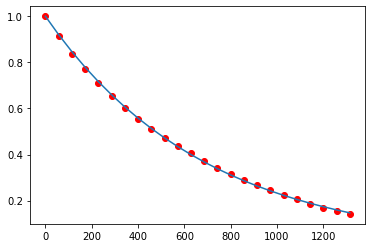

In [535]:
import scipy.optimize
x=persistence_length.x
y=persistence_length.results
lp=scipy.optimize.curve_fit(lambda x,a:np.exp(-x/a), x, y,p0=[1000])[0][0]
fit=np.exp(-x/lp)
print('The persistence length is {} Angstroms'.format(lp))
plt.figure()
plt.scatter(x,y,c='red')
plt.plot(x,fit)